### Libraries

In [503]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd 
import datetime as dt

### Prepare Notebook

In [504]:
pd.set_option('display.max_colwidth', None)

### Prepare clean data

In [505]:
df = pd.read_csv('/Users/nathanjones/Downloads/EDA_p2/Sprint_Triathlon_EDA/data/wtc_sprint_data/all_wtc_sprint_results.csv')

In [506]:
#times to floats for sums and viz
df.drop(df.loc[df.POS.isin(['DNF', 'DNS'])].index, inplace=True)

cols_to_change_timedelta = ['Swim','T1', 'Bike', 'T2', 'Run', 'Time']
for col in cols_to_change_timedelta:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()

#df['Time_format'] = pd.to_datetime(df['Time_in_seconds'], unit='s').dt.strftime('%H:%M:%S')


In [507]:
#dropping 0 times, which missed null check. 
df.drop(df.loc[df.Bike == df.Bike.min()].index, inplace=True)


In [508]:
#renaming Time col to Total_Time
df.rename(columns={'Time':'Total_Time'}, inplace=True)

In [509]:
# POS (position) to numeric 
df['POS'] = pd.to_numeric(df['POS'])

### New Features

In [510]:
#Age (all relative, calculated dynamically from current date)

today = dt.date.today()
current_year = today.year
df['Age'] = current_year - df['YOB']


In [511]:
# Age_Cat
def map_age(age:int)->str:
    if 18 <= age <=24:
        age_group = 'Young Adult 18-24'
    elif 25 <= age <= 34:
        age_group = 'Adult 25-34'
    elif 35 <= age <= 44:
        age_group =  'Middle Age 35-44'
    elif age > 44:
        age_group =  'Senior 44+'
    else:
        age_group = 'Unknown'
    
    return age_group 

df['Age_Cat'] = df['Age'].apply(map_age)

In [512]:
# Full Name
def combine_names(row):
    return str(row['First Name']) + ' ' + row['Last Name']

df['Full Name'] = df.apply(combine_names, axis=1)

### Show me some Summary Stats

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 794
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   POS         778 non-null    int64  
 1   First Name  778 non-null    object 
 2   Last Name   778 non-null    object 
 3   Nation      778 non-null    object 
 4   YOB         778 non-null    int64  
 5   Start No.   778 non-null    int64  
 6   Swim        778 non-null    float64
 7   T1          778 non-null    float64
 8   Bike        778 non-null    float64
 9   T2          778 non-null    float64
 10  Run         778 non-null    float64
 11  Total_Time  778 non-null    float64
 12  Gender      778 non-null    object 
 13  Age         778 non-null    int64  
 14  Age_Cat     778 non-null    object 
 15  Full Name   778 non-null    object 
dtypes: float64(6), int64(4), object(6)
memory usage: 103.3+ KB


In [514]:
df.describe()

,POS,YOB,Start No.,Swim,T1,Bike,T2,Run,Total_Time,Age
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.00000,778.000000,778.000000,778.000000
mean,24.897172,1995.390746,28.930591,563.164524,59.597686,1802.386889,27.12982,986.178663,3436.861183,29.609254
std,14.148676,3.691308,16.768860,31.966620,25.335257,119.412820,6.11430,75.560132,202.627741,3.691308
min,1.000000,1982.000000,1.000000,482.000000,28.000000,1565.000000,17.00000,820.000000,3003.000000,20.000000
25%,13.000000,1993.000000,15.000000,540.000000,38.000000,1729.250000,23.00000,922.000000,3261.000000,27.000000
50%,25.000000,1996.000000,29.000000,560.000000,57.500000,1790.500000,25.00000,989.500000,3438.000000,29.000000
75%,37.000000,1998.000000,43.000000,588.750000,74.000000,1895.000000,32.00000,1038.000000,3595.000000,32.000000
max,50.000000,2005.000000,64.000000,647.000000,132.000000,2192.000000,46.00000,1310.000000,4026.000000,43.000000


In [515]:
df[df.Gender == 'Male'].describe()

,POS,YOB,Start No.,Swim,T1,Bike,T2,Run,Total_Time,Age
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,25.205584,1995.720812,29.652284,539.954315,57.119289,1719.614213,26.121827,931.994924,3273.266497,29.279188
std,14.297845,3.422456,17.432484,19.603914,23.718525,75.842266,6.023734,56.605370,111.737959,3.422456
min,1.000000,1986.000000,1.000000,482.000000,28.000000,1565.000000,17.000000,820.000000,3003.000000,20.000000
25%,13.000000,1994.000000,15.000000,531.250000,36.250000,1657.250000,22.000000,895.000000,3218.000000,27.000000
50%,25.000000,1996.000000,29.500000,541.000000,57.000000,1732.000000,23.000000,922.000000,3261.500000,29.000000
75%,37.750000,1998.000000,44.750000,554.000000,73.000000,1756.000000,31.750000,956.000000,3324.750000,31.000000
max,50.000000,2005.000000,64.000000,580.000000,111.000000,1924.000000,44.000000,1310.000000,3770.000000,39.000000


In [516]:
df[df.Gender == 'Female'].describe()

,POS,YOB,Start No.,Swim,T1,Bike,T2,Run,Total_Time,Age
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,24.580729,1995.052083,28.190104,586.979167,62.140625,1887.315104,28.164062,1041.773438,3604.716146,29.947917
std,14.005547,3.923870,16.048484,23.578093,26.685696,93.522325,6.040910,46.645132,121.256434,3.923870
min,1.000000,1982.000000,1.000000,528.000000,29.000000,1690.000000,20.000000,920.000000,3319.000000,21.000000
25%,12.750000,1992.000000,15.000000,569.000000,39.000000,1813.000000,24.000000,1011.750000,3533.750000,27.000000
50%,24.500000,1995.000000,28.000000,590.000000,61.500000,1894.000000,26.000000,1035.000000,3596.500000,30.000000
75%,36.250000,1998.000000,42.000000,604.000000,80.250000,1955.250000,33.250000,1070.000000,3676.000000,33.000000
max,50.000000,2004.000000,61.000000,647.000000,132.000000,2192.000000,46.000000,1239.000000,4026.000000,43.000000


### What is the minimum standard?

The minimum standard at men's elite level in sprint distance Triathlon is 55.0 mins.
You must aim for 9.0 mins over 750m in swimming, 20km in 29.0 mins on the bike,
and run 5km in under 16.0 mins.

For women, the total to aim for is 61.0 mins:
That is 10.0 mins for the swim, 33.0 mins on the bike, and 18.0 mins for the run.

In [517]:
# formatting time for graphics 

def seconds_to_minutes_seconds(x, pos) -> int:
    minutes = x // 60  # Integer division to get minutes
    seconds = x % 60   # Modulus to get the remaining seconds
    return f'{int(minutes)}:{int(seconds):02d}'

formatter = ticker.FuncFormatter(seconds_to_minutes_seconds)

In [518]:
#seconds to mins
def seconds_to_mmss(total_seconds) -> str:
    minutes = int(total_seconds // 60)
    seconds = int(total_seconds % 60)
    return f"{minutes}:{seconds:02}"


In [519]:
# Summarize male and female data
summaries = {
    "Male": df[df.Gender == 'Male'].describe(),
    "Female": df[df.Gender == 'Female'].describe()
}

# Function to compute and round the 75% values for a given gender
def compute_75th_percentiles(summary):
    results = {}
    for col in ['Swim', 'Bike', 'Run', 'Total_Time']:
        results[col] = (summary.loc['75%', col])
    return results

# Compute percentiles for male and female
male_results = compute_75th_percentiles(summaries["Male"])
female_results = compute_75th_percentiles(summaries["Female"])

# Access results
m_75_swim, m_75_bike, m_75_run, m_75_total = (
    seconds_to_mmss(male_results['Swim']), 
    seconds_to_mmss(male_results['Bike']), 
    seconds_to_mmss(male_results['Run']), 
    seconds_to_mmss(male_results['Total_Time'])
)

f_75_swim, f_75_bike, f_75_run, f_75_total = (
    seconds_to_mmss(female_results['Swim']), 
    seconds_to_mmss(female_results['Bike']), 
    seconds_to_mmss(female_results['Run']), 
    seconds_to_mmss(female_results['Total_Time'])
)


In [520]:
print(
    f"The minimum standard at men's elite level in sprint distance Triathlon is {m_75_total} mins.\n"
    f"You must aim for {m_75_swim} mins over 750m in swimming, 20km in {m_75_bike} mins on the bike,\n"
    f"and run 5km in under {m_75_run} mins.\n"
    f"\nFor women, the total to aim for is {f_75_total} mins:\n"
    f"That is {f_75_swim} mins for the swim, {f_75_bike} mins on the bike, and {f_75_run} mins for the run."
)


The minimum standard at men's elite level in sprint distance Triathlon is 55:24 mins.
You must aim for 9:14 mins over 750m in swimming, 20km in 29:16 mins on the bike,
and run 5km in under 15:56 mins.

For women, the total to aim for is 61:16 mins:
That is 10:04 mins for the swim, 32:35 mins on the bike, and 17:50 mins for the run.


#### outliers?

IQR and Boxplots show outliers in total_time. These athletes likely had a fall, puncture, or injury during the race but still managed to finish.

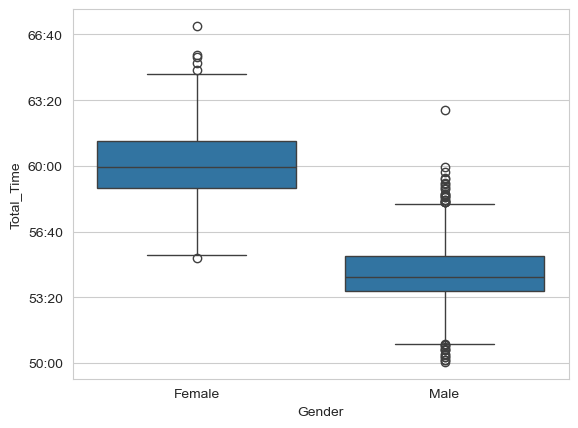

In [521]:
sns.boxplot(data=df, x='Gender', y='Total_Time')
plt.gca().yaxis.set_major_formatter(formatter)


### How fast is fast?

The highest standard at **men's** elite level in sprint distance triathlon is average 52:50 mins.
To win, you must aim for 8:55 mins over 750m in swimming, 20km in 28:16 mins on the bike,
and run 5km in under 14:20 mins. For **women**, the total to aim for is 57:52 mins:
That is 9:30 mins for the swim, 30:46 mins on the bike, and 16:09 mins for the run.

In [522]:
position = '1' 
pos_subset = {
    "Male": df[(df.Gender == 'Male') & (df.POS == position)].describe(),
    "Female": df[(df.Gender == 'Female') & (df.POS == position)].describe()
}
top_men = pos_subset['Male']
top_women = pos_subset['Female']


In [523]:
top_men_swim, top_men_bike, top_men_run, top_men_total = (
    seconds_to_mmss(top_men.loc['mean', 'Swim']),
    seconds_to_mmss(top_men.loc['mean', 'Bike']),
    seconds_to_mmss(top_men.loc['mean', 'Run']),
    seconds_to_mmss(top_men.loc['mean', 'Total_Time'])
)

ValueError: cannot convert float NaN to integer

In [484]:
top_women_swim, top_women_bike, top_women_run, top_women_total = (
    seconds_to_mmss(top_women.loc['mean', 'Swim']),
    seconds_to_mmss(top_women.loc['mean', 'Bike']),
    seconds_to_mmss(top_women.loc['mean', 'Run']),
    seconds_to_mmss(top_women.loc['mean', 'Total_Time'])
)

In [485]:
print(
    f"The highest standard at men's elite level in sprint distance Triathlon is {top_men_total} mins.\n"
    f"To win, you must aim for {top_men_swim} mins over 750m in swimming, 20km in {top_men_bike} mins on the bike,\n"
    f"and run 5km in under {top_men_run} mins.\n"
    f"\nFor women, the total to aim for is {top_women_total} mins:\n"
    f"That is {top_women_swim} mins for the swim, {top_women_bike} mins on the bike, and {top_women_run} mins for the run."
)

The highest standard at men's elite level in sprint distance Triathlon is 52:50 mins.
To win, you must aim for 8:55 mins over 750m in swimming, 20km in 28:16 mins on the bike,
and run 5km in under 14:20 mins.

For women, the total to aim for is 57:52 mins:
That is 9:30 mins for the swim, 30:46 mins on the bike, and 16:09 mins for the run.


#### Who are the fastest?

In [486]:
# Overall

print(df[df['Gender']=='Male'].sort_values(by='Total_Time').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Nation', 'Total_Time']])
print(df[df['Gender']=='Female'].sort_values(by='Total_Time').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Nation', 'Total_Time']])

    Gender POS First Name Last Name Nation  Total_Time
745   Male   1    Matthew    Hauser    AUS      3003.0
746   Male   2      Vasco    Vilaca    POR      3009.0
747   Male   3     Pierre  Le Corre    FRA      3010.0
     Gender POS First Name  Last Name Nation  Total_Time
549  Female   1  Cassandre  Beaugrand    FRA      3319.0
550  Female   2       Lisa    Tertsch    GER      3330.0
551  Female   3       Beth     Potter    GBR      3331.0


In [487]:
# Swimmers 
print(df[df['Gender']=='Male'].sort_values(by='Swim').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Nation', 'Swim']])
print(df[df['Gender']=='Female'].sort_values(by='Swim').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Nation', 'Swim']])


    Gender POS First Name Last Name Nation   Swim
645   Male   1    Matthew    Hauser    AUS  482.0
654   Male  10      Kenji     Nener    JPN  484.0
672   Male  28     Nicolò    Strada    ITA  484.0
     Gender POS First Name Last Name Nation   Swim
520  Female  22   Vittoria     Lopes    BRA  528.0
527  Female  29       Lena   Meißner    GER  530.0
504  Female   6     Taylor     Knibb    USA  532.0


In [488]:
# Bikers 
print(df[df['Gender']=='Male'].sort_values(by='Bike').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Bike', 'Total_Time']])
print(df[df['Gender']=='Female'].sort_values(by='Bike').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Bike', 'Total_Time']])

    Gender POS First Name   Last Name    Bike  Total_Time
756   Male  12       Emil        Holm  1565.0      3053.0
759   Male  15      Henry        Graf  1567.0      3059.0
770   Male  26      Simon  Westermann  1568.0      3093.0
     Gender POS First Name     Last Name    Bike  Total_Time
404  Female   5     Taylor         Knibb  1690.0      3395.0
400  Female   1      Flora         Duffy  1699.0      3341.0
401  Female   2    Georgia  Taylor-Brown  1700.0      3353.0


In [489]:
#Runners 

print(df[df['Gender']=='Male'].sort_values(by='Run').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Nation', 'Run']])
print(df[df['Gender']=='Female'].sort_values(by='Run').head(3)[['Gender','POS', 'First Name', 'Last Name', 'Nation', 'Run']])


    Gender POS First Name Last Name Nation    Run
745   Male   1    Matthew    Hauser    AUS  820.0
746   Male   2      Vasco    Vilaca    POR  829.0
747   Male   3     Pierre  Le Corre    FRA  830.0
     Gender POS First Name  Last Name Nation    Run
549  Female   1  Cassandre  Beaugrand    FRA  920.0
551  Female   3       Beth     Potter    GBR  932.0
552  Female   4     Jeanne     Lehair    LUX  932.0


### How are the times distributed?

Distribution of Total_Time has a long tail in women's races. The faster female athletes are in a league of their own and there is a broader spread of slower athletes. In contrast, male races have a more standard distribution, with the fastest and slowest being similarly rare. Male races are more competitive. Regardless of gender, the run is the most competitive part of the race with a high concentration of athletes performing at the fastest times. 

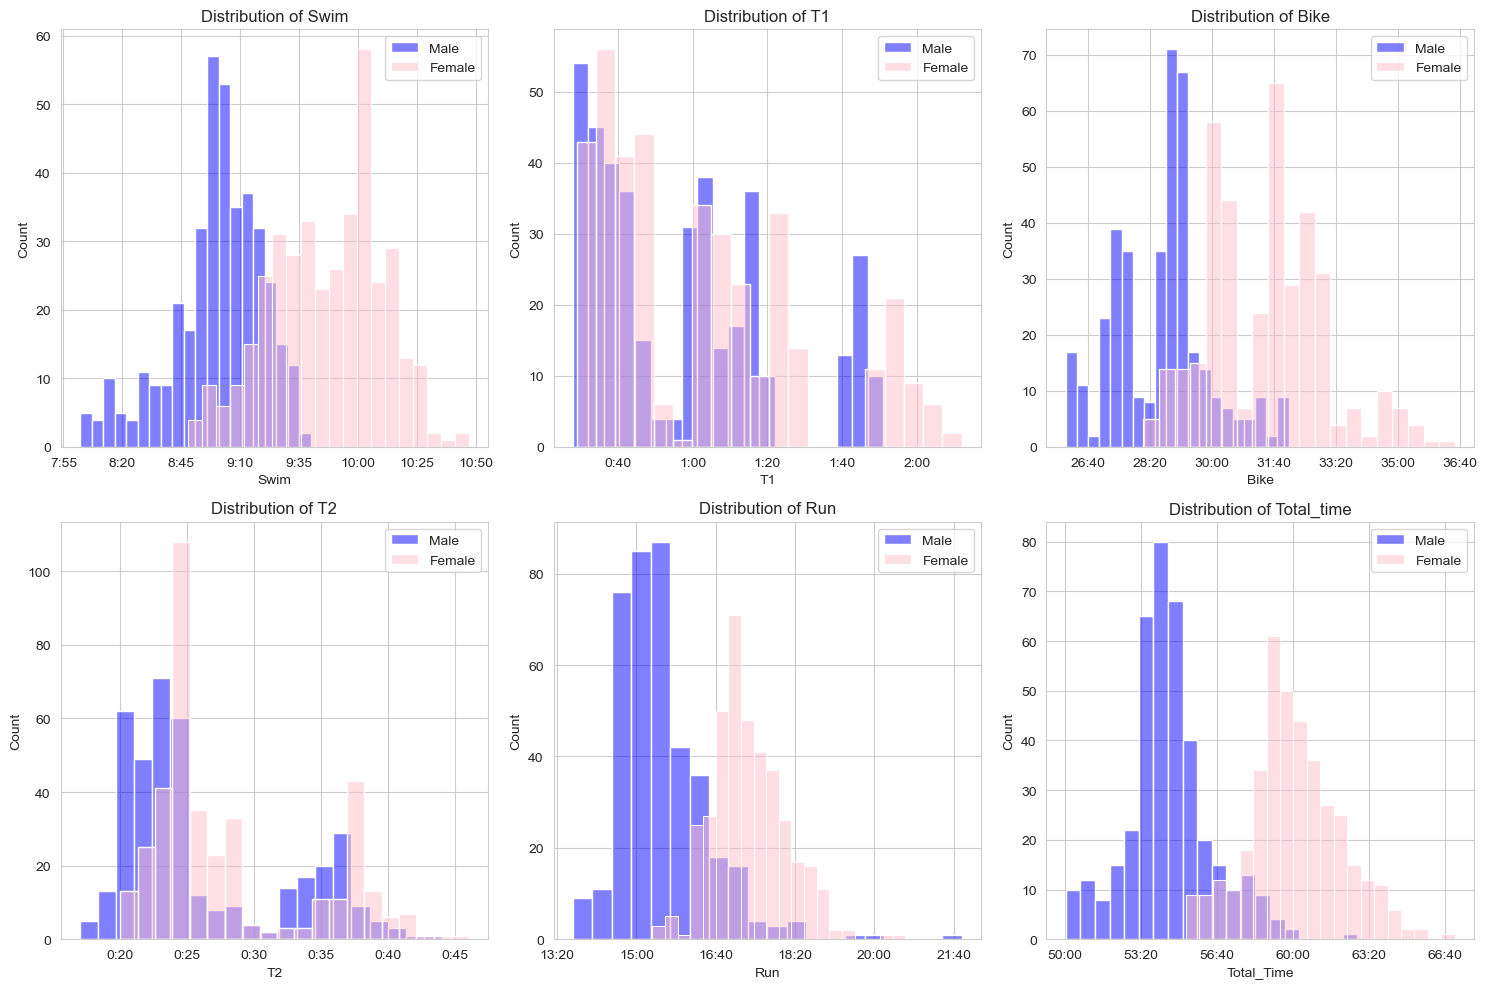

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
columns = ['Swim', 'T1', 'Bike', 'T2', 'Run', 'Total_Time']



for ax, col in zip(axes, columns):
    sns.histplot(data=df[df['Gender'] == 'Male'], x=col, ax=ax, fill=True, bins=20, color='blue', alpha=0.5, label='Male')
    sns.histplot(data=df[df['Gender'] == 'Female'], x=col, ax=ax, fill=True, bins=20, color='pink', alpha=0.5, label='Female')
    ax.set_title(f'Distribution of {col.capitalize()}', fontsize=12)
    ax.legend()
    ax.xaxis.set_major_formatter(formatter)  # Apply the formatter to the x-axis

plt.tight_layout()
plt.show()


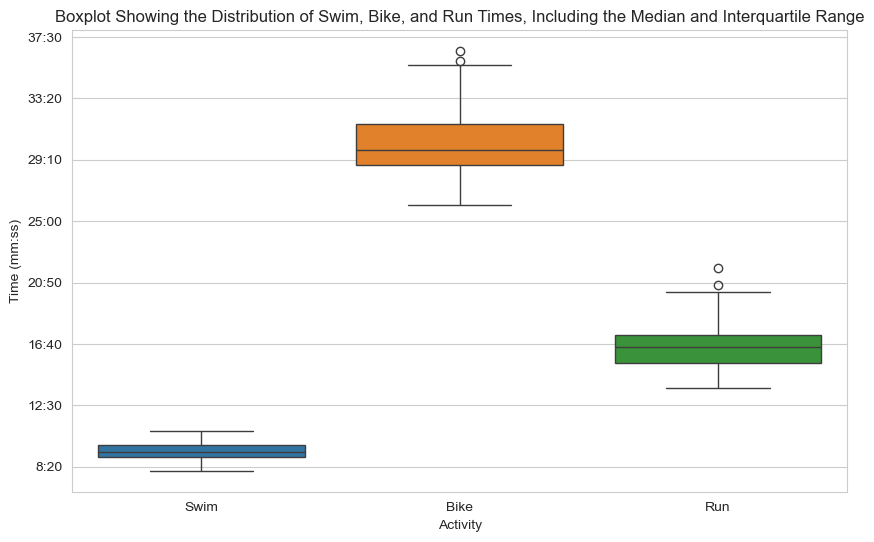

In [ ]:
# Create a DataFrame with only the relevant columns
times_df = df[['Swim', 'Bike', 'Run']]

# Reshape the DataFrame using `melt` to create a long-form DataFrame
times_long = pd.melt(times_df, var_name='Activity', value_name='Time')

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=times_long, x='Activity', y='Time', hue='Activity')

# Title and labels
plt.title("Boxplot Showing the Distribution of Swim, Bike, and Run Times, Including the Median and Interquartile Range")
plt.xlabel('Activity')
plt.ylabel('Time (mm:ss)')
plt.gca().yaxis.set_major_formatter(formatter) #change labels to minutes equivalent


# Show plot
plt.show()


### Which is the fastest country?

The fastest country in terms of average total time is France for males, and Great Britain for females. As previously observed, there is also much less variation in performance in the male field, making it more competitive.

#### But the number of participants per nation is not equal. So This is not truly representative.

**Weighted Average** will remedy this fault, though.
Weighted Average = sum(n.participants * average_time) / sum(n.participants)

In [492]:
avg_times = df.groupby(['Nation', 'Gender']).agg(
    Average_Time = ('Total_Time', 'mean'),
    Num_Participants = ('Total_Time', 'size'),
).sort_values(by='Average_Time', ascending=True)

#excludes Ireland which only has one athlete and skews the results.
avg_times=avg_times[avg_times['Num_Participants']>3]

#round the mean
avg_times['Average_Time']=avg_times['Average_Time'].round()




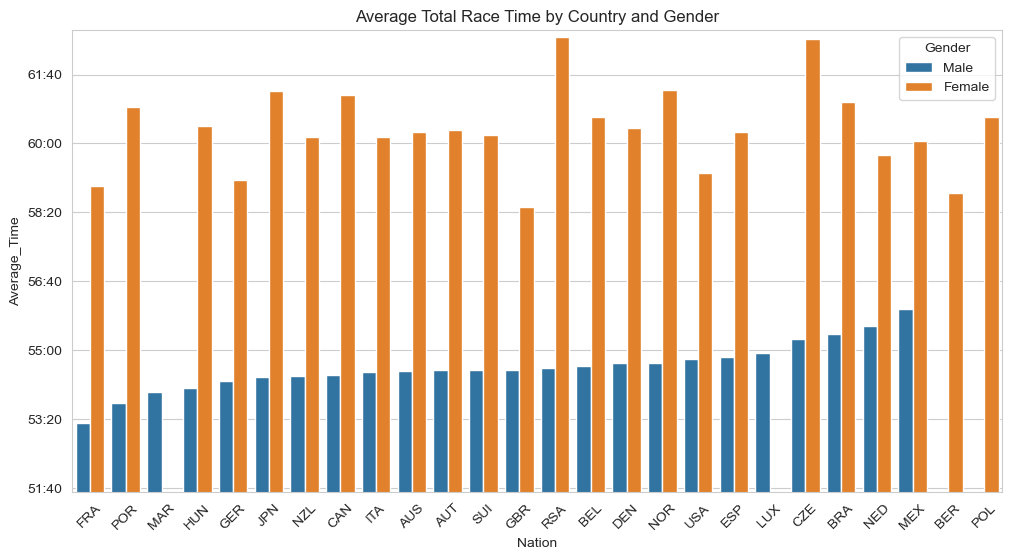

In [ ]:
#Average Total Race Time by Country and Gender, Ascending 

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(data=avg_times.reset_index().sort_values(by='Average_Time', ascending=True),
            x='Nation',
            y='Average_Time',
            hue='Gender')
plt.xticks(rotation=45)
plt.ylim(avg_times['Average_Time'].min()-100,
         avg_times['Average_Time'].max()+10) #padding on axis limits
plt.gca().yaxis.set_major_formatter(formatter) #change labels to minutes equivalent
plt.title('Average Total Race Time by Country and Gender')
plt.show()

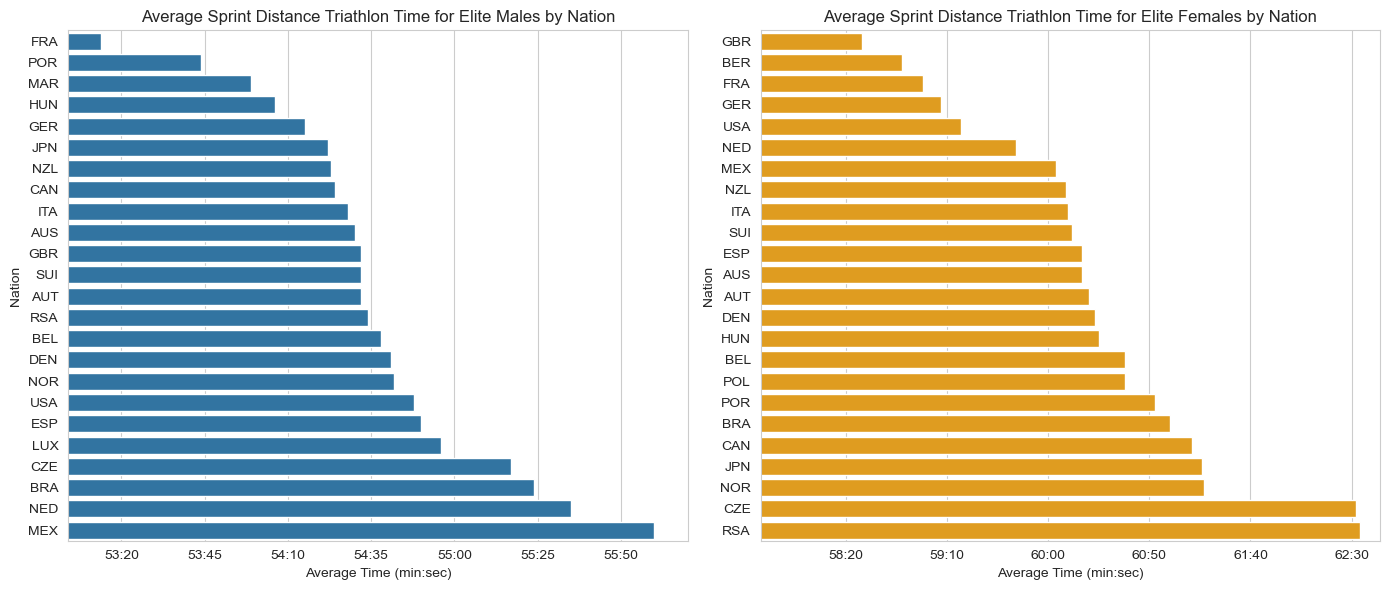

In [ ]:
# Reset index to make 'Gender' a column again
avg_times_reset = avg_times.reset_index()

# Filter the data into separate DataFrames for males and females
males_data = avg_times_reset[avg_times_reset['Gender'] == 'Male']
females_data = avg_times_reset[avg_times_reset['Gender'] == 'Female']

# Create the subplots (2 subplots in a row)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create the barplot for males on the first subplot
sns.barplot(x='Average_Time', y='Nation', data=males_data, ax=axes[0])
axes[0].set_title('Average Sprint Distance Triathlon Time for Elite Males by Nation')
axes[0].set_xlabel('Average Time (min:sec)')
axes[0].set_ylabel('Nation')
axes[0].xaxis.set_major_formatter(formatter)
axes[0].set_xlim(males_data['Average_Time'].min() - 10, 
                 males_data['Average_Time'].max() + 10)


# Create the barplot for females on the second subplot
sns.barplot(x='Average_Time', y='Nation', data=females_data, ax=axes[1], color='orange')
axes[1].set_title('Average Sprint Distance Triathlon Time for Elite Females by Nation')
axes[1].set_xlabel('Average Time (min:sec)')
axes[1].set_ylabel('Nation')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].set_xlim(females_data['Average_Time'].min() - 50, 
                 females_data['Average_Time'].max() + 10)

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Show the plot
plt.show()


In [495]:
#more interactive visual with hover labels
import plotly.express as px

# Create an interactive barplot
fig = px.bar(
    avg_times.reset_index(),
    x='Nation',
    y='Average_Time',
    color='Gender',
    text='Average_Time',  # Optional: Show the average time directly on bars
    hover_data={'Average_Time': True, 'Num_Participants': True, 'Nation': False}
)

# Update layout for better appearance
fig.update_layout(
    title="Average Time by Nation and Gender",
    xaxis_title="Nation",
    yaxis_title="Average Time",
    legend_title="Gender",
    template="plotly_dark",  # Optional for a dark theme
)

# Show the figure
fig.show()

### Which are the best all-rounders?

An all-rounder is an athlete who performs consistently across all disciplines. This means that they have a low standard deviation across all disciplines, compared to other athletes. 

In [496]:
min_no_appearnaces = 4
various_appearances = df['Full Name'].value_counts()
various_appearances = various_appearances[various_appearances >= min_no_appearnaces].reset_index()

In [527]:
# sum of std for swim bike run. MALES
male_all_disciplines_std = df[(df['Gender']=='Male')&(df['Full Name'].isin(various_appearances['Full Name']))].groupby(['Full Name'])[['Swim', 'Bike', 'Run']].std().reset_index()
column_names = ['Swim', 'Bike', 'Run']
male_all_disciplines_std['Total_Std'] = male_all_disciplines_std[column_names].sum(axis=1)
male_all_disciplines_std = male_all_disciplines_std.sort_values(by='Total_Std')[['Full Name', 'Total_Std']].head(10)

# Calculate average position for each athlete
avg_position = (
    df.groupby('Full Name')['POS'].mean()
    .rename('Avg_POS')
    .reset_index()
)

# Merge the average position data into the main DataFrame
male_all_disciplines_std = male_all_disciplines_std.merge(avg_position, on='Full Name', how='left')

In [529]:
# sum of std for swim bike run. FEMALES
female_all_disciplines_std = df[(df['Gender']=='Female')&(df['Full Name'].isin(various_appearances['Full Name']))].groupby(['Full Name'])[['Swim', 'Bike', 'Run']].std().reset_index()
column_names = ['Swim', 'Bike', 'Run']
female_all_disciplines_std['Total_Std'] = female_all_disciplines_std[column_names].sum(axis=1)
female_all_disciplines_std= female_all_disciplines_std.sort_values(by='Total_Std')[['Full Name', 'Total_Std']].head(10)

# Calculate average position for each athlete
avg_position = (
    df.groupby('Full Name')['POS'].mean()
    .rename('Avg_POS')
    .reset_index()
)

# Merge the average position data into the main DataFrame
female_all_disciplines_std = female_all_disciplines_std.merge(avg_position, on='Full Name', how='left')


/var/folders/79/phpgk8h572b60699bk5qy1r40000gn/T/ipykernel_11402/3426842574.py:14: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.



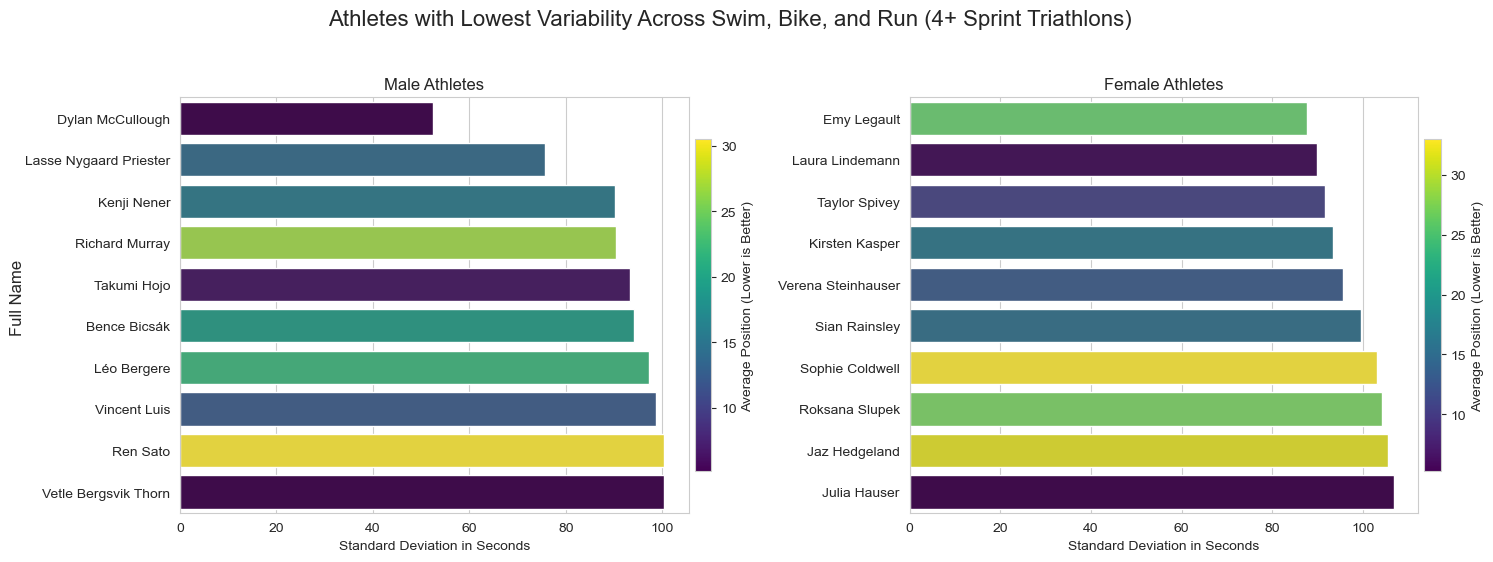

In [540]:
import matplotlib.cm as cm

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for male athletes

# Normalize Avg_POS for color mapping
male_norm = plt.Normalize(male_all_disciplines_std['Avg_POS'].min(), male_all_disciplines_std['Avg_POS'].max())
male_sm = cm.ScalarMappable(cmap="viridis", norm=male_norm) #keeping for colourbar 

male_colours = sns.color_palette("viridis", as_cmap=True)(male_norm(male_all_disciplines_std['Avg_POS']))
male_colours = male_colours.tolist()

sns.barplot(y='Full Name', x='Total_Std', 
            data=male_all_disciplines_std, 
            ax=axes[0],
            palette=male_colours,
            hue='Avg_POS',
            dodge=False,
            legend=False)

axes[0].set_title('Male Athletes')
axes[0].set_xlabel('Standard Deviation in Seconds')
axes[0].set_ylabel('')

# Plot for female athletes
female_norm = plt.Normalize(female_all_disciplines_std['Avg_POS'].min(), female_all_disciplines_std['Avg_POS'].max())
female_sm = cm.ScalarMappable(cmap="viridis", norm=female_norm)

female_colours = sns.color_palette("viridis", as_cmap=True)(female_norm(female_all_disciplines_std['Avg_POS']))
female_colours = female_colours.tolist()

sns.barplot(y='Full Name', x='Total_Std', 
            data=female_all_disciplines_std, 
            ax=axes[1],
            palette=female_colours,
            hue='Avg_POS',
            dodge=False,
            legend=False)

axes[1].set_title('Female Athletes')
axes[1].set_xlabel('Standard Deviation in Seconds')
axes[1].set_ylabel('')  # Remove individual y-label for consistency

#add colour bars to figure
cbar_male = fig.colorbar(male_sm, ax=axes[0], orientation='vertical', shrink=0.8, pad=0.01)
cbar_male.set_label('Average Position (Lower is Better)')

cbar_female = fig.colorbar(female_sm, ax=axes[1], orientation='vertical', shrink=0.8, pad=0.01)
cbar_female.set_label('Average Position (Lower is Better)')

# Add a shared y-axis label
fig.text(0.05, 0.5, 'Full Name', va='center', rotation='vertical', fontsize=12)

# Add a shared title
fig.suptitle('Athletes with Lowest Variability Across Swim, Bike, and Run (4+ Sprint Triathlons)', fontsize=16)

# Adjust layout to make space for the shared title and y-label
fig.tight_layout(rect=[0.05, 0.05, 1, 0.95])

plt.show()

### Which are the Most Consistent Athletes?

#### most consistent with respect to overall times

In [445]:
male_std = df[(df['Gender']=='Male')&(df['Full Name'].isin(various_appearances['Full Name']))].groupby(['Full Name'])['Total_Time'].std().sort_values(ascending=True).reset_index().rename(columns={'Total_Time':'Std_Total_Time'}).head(10)
female_std = df[(df['Gender']=='Female')&(df['Full Name'].isin(various_appearances['Full Name']))].groupby(['Full Name'])['Total_Time'].std().sort_values(ascending=True).reset_index().rename(columns={'Total_Time':'Std_Total_Time'}).head(10)

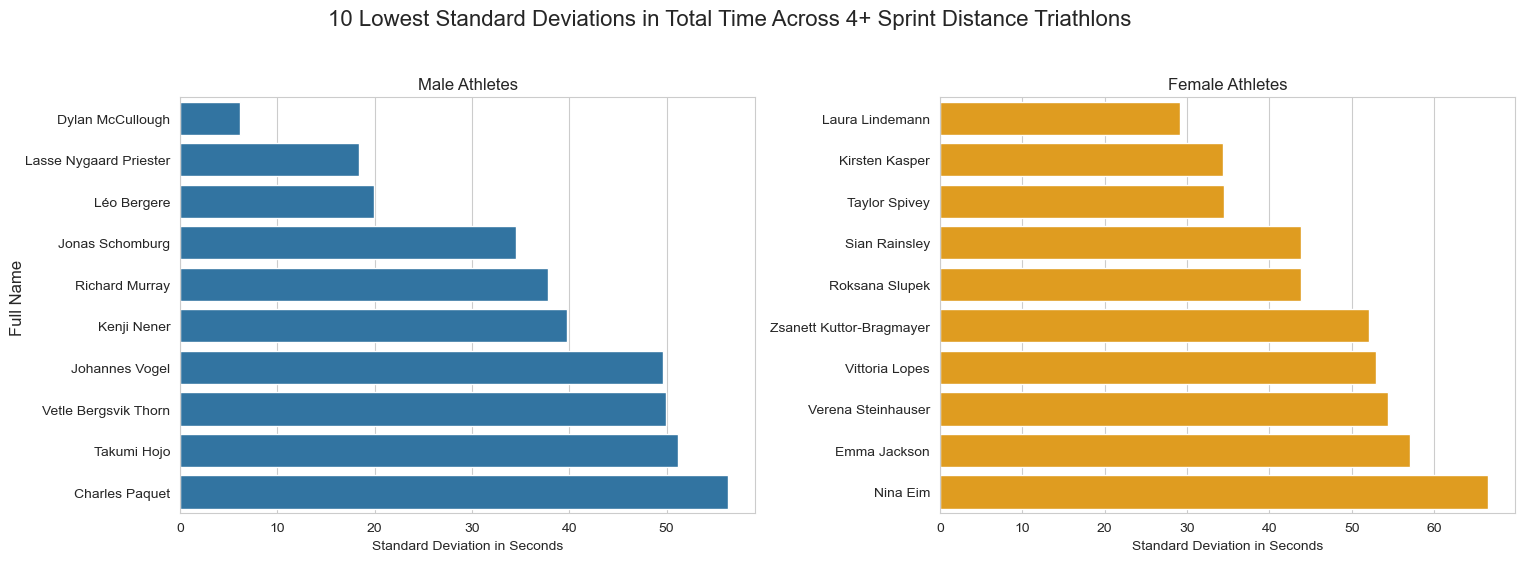

In [446]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for male athletes
sns.barplot(y='Full Name', x='Std_Total_Time', data=male_std, ax=axes[0])
axes[0].set_title('Male Athletes')
axes[0].set_xlabel('Standard Deviation in Seconds')
axes[0].set_ylabel('')

# Plot for female athletes
sns.barplot(y='Full Name', x='Std_Total_Time', data=female_std, ax=axes[1], color='orange')
axes[1].set_title('Female Athletes')
axes[1].set_xlabel('Standard Deviation in Seconds')
axes[1].set_ylabel('')  # Remove individual y-label for consistency

# Add a shared y-axis label
fig.text(0.05, 0.5, 'Full Name', va='center', rotation='vertical', fontsize=12)

# Add a shared title
fig.suptitle('10 Lowest Standard Deviations in Total Time Across 4+ Sprint Distance Triathlons', fontsize=16)

# Adjust layout to make space for the shared title and y-label
fig.tight_layout(rect=[0.05, 0.05, 1, 0.95])

plt.show()



### Age focus

New Age_Cat column creates bins for ages as a practise exercise; the same analysis is easily achieved using sns.histplot as demonstrated below. It shows that the majority of elite athletes peak at 30, and for females this extends to 35.

Nevertheless, categorising ages allows for a relationship analysis using swarmplots.

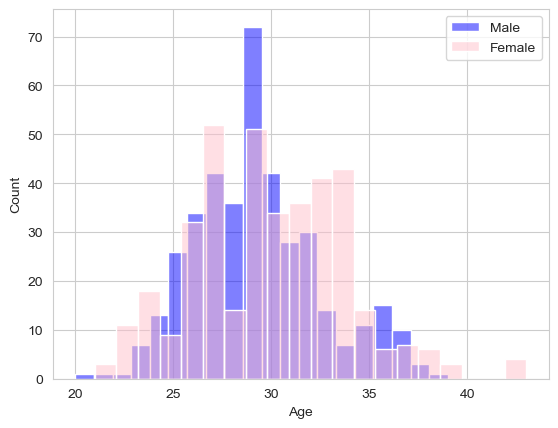

In [ ]:
# age distribution 

sns.histplot(data=df[df['Gender'] == 'Male'], x='Age', fill=True, bins=20, color='blue', alpha=0.5, label='Male')
sns.histplot(data=df[df['Gender'] == 'Female'], x='Age', fill=True, bins=20, color='pink', alpha=0.5, label='Female')
plt.legend()
plt.show()

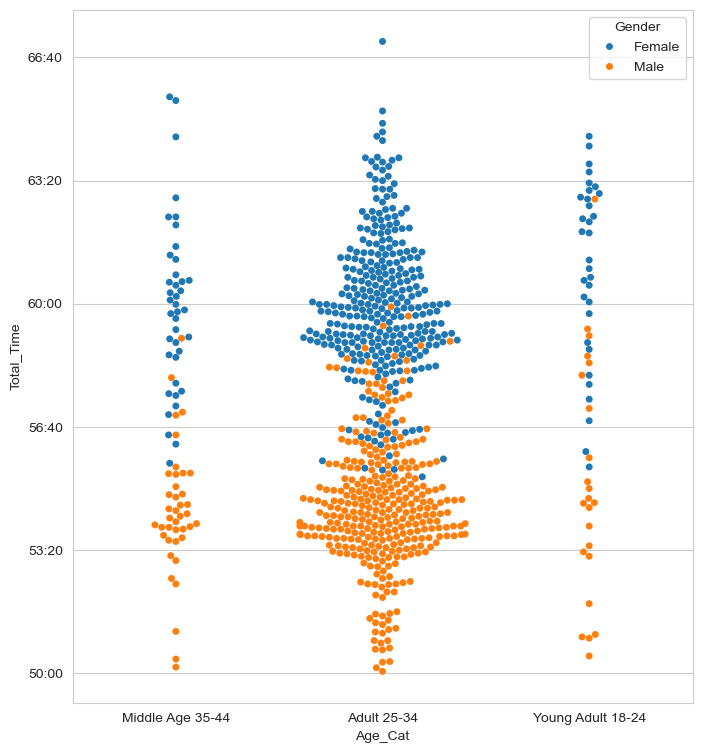

In [ ]:
plt.figure(figsize=(8,9))
sns.swarmplot(data=df, x='Age_Cat', y='Total_Time', hue='Gender')
plt.gca().yaxis.set_major_formatter(formatter) #change labels to minutes equivalent
plt.show()

<Axes: xlabel='YOB', ylabel='Total_Time'>

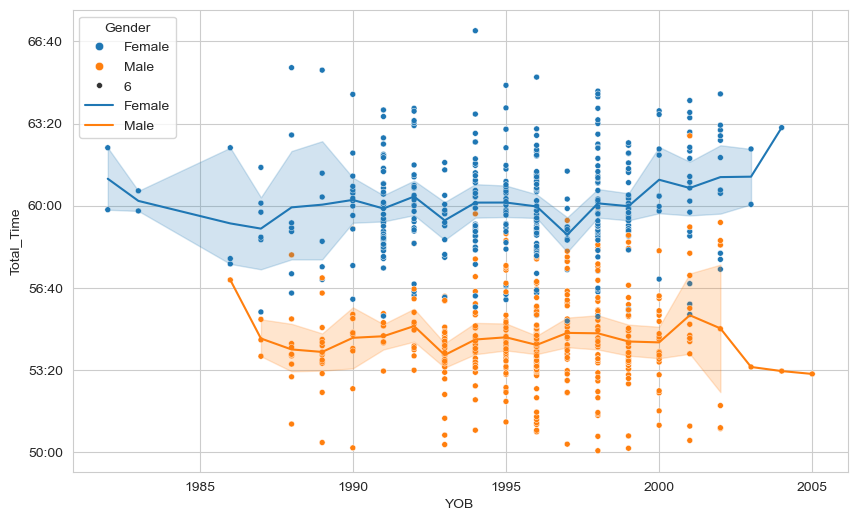

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YOB', y='Total_Time', hue='Gender', size=6)
plt.gca().yaxis.set_major_formatter(formatter) #change labels to minutes equivalent
sns.lineplot(data=df, x='YOB', y='Total_Time', hue='Gender')

### Feature Relationships

**Bike** and **Run** have the strongest correlation with **Total_Time**. 
Interestingly, **Bike** and **Run** are also strongly correlated with eachother. 
**T2** is more strongly correlated with **Total_Time** than **T1**. 

Text(0.5, 1.0, 'Feature Relationship in Elite Sprint Triathlon Race Times')

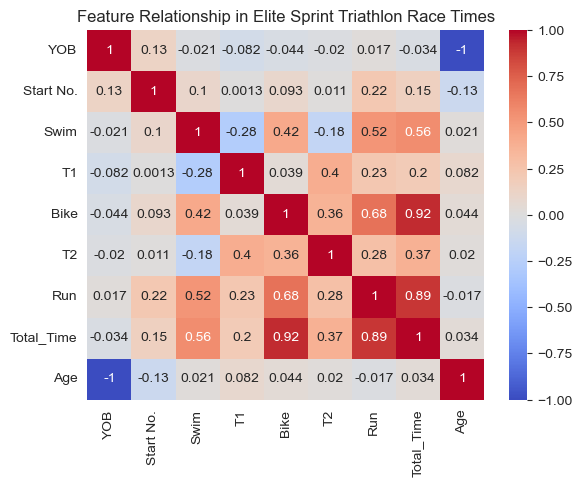

In [ ]:
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Relationship in Elite Sprint Triathlon Race Times')


#### Regression Model

In [451]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

In [452]:
df['Total_Time'].skew()

0.1435428285850243

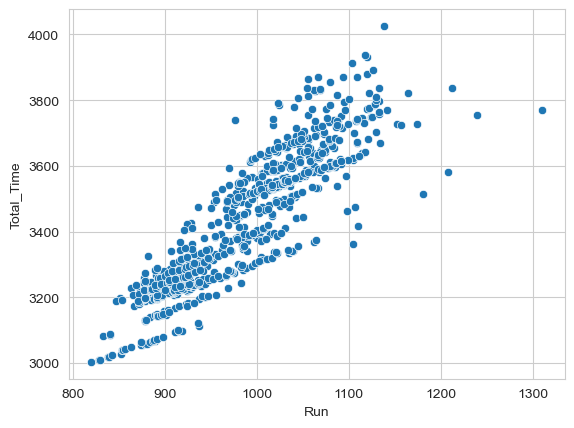

In [453]:
sns.scatterplot(data=df, x='Run', y='Total_Time');

In [454]:
X = df[['Run']]
y = df['Total_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(622, 1)
(622,)
(156, 1)
(156,)


In [455]:
result_model = LinearRegression()
result_model.fit(X_train, y_train)
result_pred = result_model.predict(X_test)

In [456]:
result_model.coef_

array([2.35963124])

In [457]:
print("R2 score test", r2_score(y_test, result_pred))
print("mean_absolute_error test", mean_absolute_error(y_test, result_pred))
print("mean_squared_error test", mean_squared_error(y_test, result_pred))
print("root_mean_squared_error test", mean_squared_error(y_test, result_pred) ** (1/2))
print("mean_absolute_percentage_error test", mean_absolute_percentage_error(y_test, result_pred))

R2 score test 0.8037556210241779
mean_absolute_error test 70.84827531880708
mean_squared_error test 8724.452701762417
root_mean_squared_error test 93.40477879510458
mean_absolute_percentage_error test 0.02038363299497786


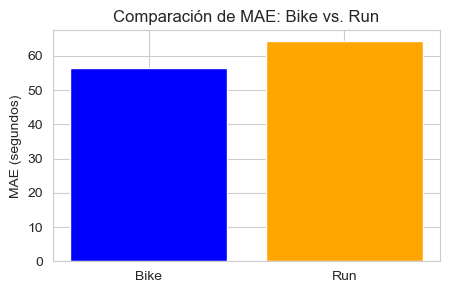

In [ ]:
mae_comparison = [56.53, 64.28]
variables = ['Bike', 'Run']
plt.figure(figsize=(5,3))
plt.bar(variables, mae_comparison, color=['blue', 'orange'])
plt.title('Comparación de MAE: Bike vs. Run')
plt.ylabel('MAE (segundos)')
plt.show()
